In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from pprint import pprint

In [2]:
# Import the csvs into DataFrames
dairy = pd.read_csv("Resources/dymfg.csv")
meat = pd.read_csv("Resources/mtpcc.csv")
fats = pd.read_csv("Resources/fats.csv")
fruit = pd.read_csv("Resources/frtot.csv")
veggie = pd.read_csv("Resources/vegtot.csv")
grain = pd.read_csv("Resources/grains.csv")
sugar = pd.read_csv("Resources/sugar.csv")
recommended = pd.read_csv("Resources/Recommended.csv")
fats.head()

,Year,Variable,Unit,Commodity,Primary weight,Loss from primary to retail weight,Retail weight,Loss from retail/institutional to consumer level,Consumer weight,Nonedible share,Edible weight,Other (cooking loss and uneaten food),"Total loss, all levels",Per capita availability (lbs/year),Per capita availability (oz/day),Per capita availability (g/day),Calories per fat gram,Daily fat grams,Calories available daily
0,1970,Added fats and oils,Pounds,Butter,5.365702,0.0,5.365702,7.0,4.990103,0.0,4.990103,35.0,39.55,3.243567,0.142184,4.030839,9.0,3.224671,29.022038
1,1971,Added fats and oils,Pounds,Butter,5.145983,0.0,5.145983,7.0,4.785764,0.0,4.785764,35.0,39.55,3.110747,0.136362,3.865780,9.0,3.092624,27.833619
2,1972,Added fats and oils,Pounds,Butter,4.951438,0.0,4.951438,7.0,4.604837,0.0,4.604837,35.0,39.55,2.993144,0.131206,3.719634,9.0,2.975707,26.781362
3,1973,Added fats and oils,Pounds,Butter,4.807295,0.0,4.807295,7.0,4.470784,0.0,4.470784,35.0,39.55,2.906010,0.127387,3.611350,9.0,2.889080,26.001719
4,1974,Added fats and oils,Pounds,Butter,4.460408,0.0,4.460408,7.0,4.148179,0.0,4.148179,35.0,39.55,2.696316,0.118195,3.350760,9.0,2.680608,24.125475


In [3]:
#Group by Year, combine into singular DataFrame
#Dairy
Dairy = dairy.groupby('Year').sum().reset_index()
Dairy['Dairy'] = round(Dairy['Calories available daily '],2)
total = Dairy[['Year', 'Dairy']]

#Meat
Meat = meat.groupby('Year').sum().reset_index()
total['Meat'] = round(Meat['Calories available daily '],2)

#Fats
Fats = fats.groupby('Year').sum().reset_index()
total['Fats'] = round(Fats['Calories available daily '],2)

#Fruits
Fruit = fruit.groupby('Year').sum().reset_index()
total['Fruit'] = round(Fruit['Calories available daily '],2)

#Vegetables
Veggie = veggie.groupby('Year').sum().reset_index()
total['Vegetable'] = round(Veggie['Calories available daily '],2)

#Grain
Grain = grain.groupby('Year').sum().reset_index()
total['Grain'] = round(Grain['Calories available daily '],2)


total = total.set_index('Year')
total2 = round(total.div(total.sum(axis=1), axis=0),4)
total2 = total2.reset_index()
total = total.reset_index()
total2.to_csv("Resources/total.csv")
total2.head(46)

C:\Users\alana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\alana\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\alana\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,Year,Dairy,Meat,Fats,Fruit,Vegetable,Grain
0,1970,0.1454,0.2957,0.2011,0.0414,0.0782,0.2381
1,1971,0.1460,0.3005,0.1990,0.0425,0.0770,0.2350
2,1972,0.1449,0.3002,0.2057,0.0400,0.0767,0.2324
3,1973,0.1451,0.2851,0.2093,0.0421,0.0774,0.2409
4,1974,0.1417,0.2960,0.2056,0.0427,0.0747,0.2393
5,1975,0.1405,0.2894,0.2053,0.0445,0.0768,0.2434
6,1976,0.1368,0.2927,0.2083,0.0438,0.0747,0.2436
7,1977,0.1387,0.2957,0.2039,0.0448,0.0759,0.2410
8,1978,0.1373,0.2911,0.2091,0.0446,0.0725,0.2454
9,1979,0.1355,0.2869,0.2127,0.0442,0.0740,0.2469


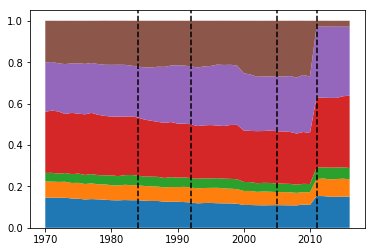

In [4]:
# Test Graph. Note that the Fats/Grain that were changed will be fixed after we meet on Tueday
legend = ['Dairy', 'Vegetables', 'Fruit', 'Meat', 'Grain','Fats', 'Sugar']
plt.stackplot(total2.Year, total2.Dairy, 
         total2.Vegetable,
         total2.Fruit,
         total2.Meat,  
         total2.Grain,
         total2.Fats)

xposition = [1984, 1992, 2005, 2011]
for xc in xposition:
   plt.axvline(x=xc, color='black', linestyle='--')


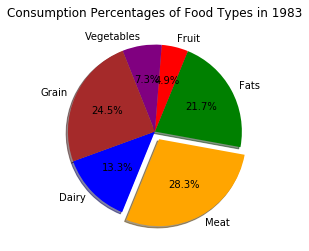

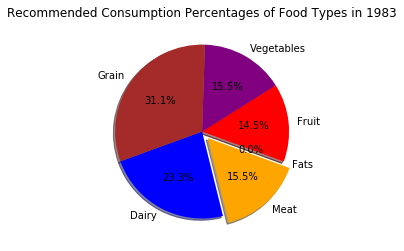

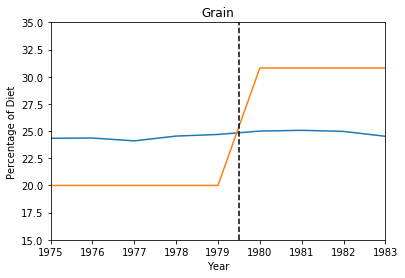

In [5]:
# Chris' Block --------------------------------------
#1983, index(13)
data_1983 = total2.loc[13,:]
#print(data_1983)
data=data_1983[[1,2,3,4,5,6]]
#print(data)
#Labels
legend = ['Dairy', 'Meat', 'Fats', 'Fruit', 'Vegetables', 'Grain']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
#print(legend)
explode = (0, 0.1, 0, 0, 0, 0)
#actual pie
plt.figure(0)
plt.pie(data, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Percentages of Food Types in 1983")
plt.savefig("Images/Consumption_percentages_1983.png", transparent=True)

#recommended pie
plt.figure(1)
rec_1983 = recommended.loc[13,:]
data2=rec_1983[[3, 4, 6, 1, 5, 2]]
plt.pie(data2, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Recommended Consumption Percentages of Food Types in 1983")
plt.savefig("Images/Recommended_percentages_1983.png", transparent=True)

# Line graph Grain
plt.figure(2)
plt.plot(total2.Year, (total2.Grain *100))
plt.plot(total2.Year, recommended.Grain)
plt.title("Grain")
plt.xlabel("Year")
plt.ylabel("Percentage of Diet")
plt.xlim(1975, 1983)
plt.ylim(15, 35)
plt.axvline(x=1979.5, color='black', linestyle='--')
plt.savefig("Images/Grain_change_1983.png", transparent=True)

#------------------------------------------------------------------


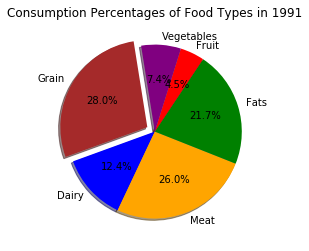

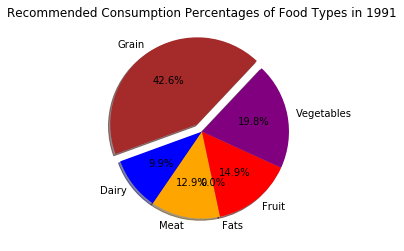

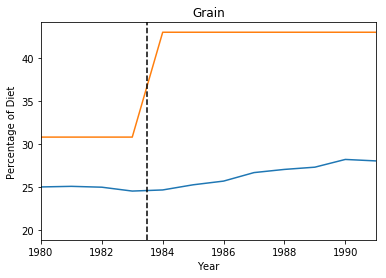

In [6]:
# Kayti' Block --------------------------------------
#1991, index(21)
data_1991 = total.loc[21,:]
#print(data_1991)
data=data_1991[[1,2,3,4,5,6]]
#print(data)
#print(legend)
explode = (0, 0, 0, 0, 0, 0.1)
#actual pie
plt.figure(0)
plt.pie(data, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Percentages of Food Types in 1991")
plt.savefig("Images/Consumption_percentages_1991.png", transparent=True)
#recommended pie
plt.figure(1)
rec_1991 = recommended.loc[21,:]
data2=rec_1991[[3, 4, 6, 1, 5, 2]]
plt.pie(data2, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Recommended Consumption Percentages of Food Types in 1991")
plt.savefig("Images/Recommended_percentages_1991.png", transparent=True)

# Line graph Grain
plt.figure(2)
plt.plot(total2.Year, (total2.Grain *100))
plt.plot(total2.Year, recommended.Grain)
plt.title("Grain")
plt.xlabel("Year")
plt.ylabel("Percentage of Diet")
plt.xlim(1980, 1991)
#plt.ylim(15, 35)
plt.axvline(x=1983.5, color='black', linestyle='--')
plt.savefig("Images/Grain_change_1991.png", transparent=True)

#------------------------------------------------------------------

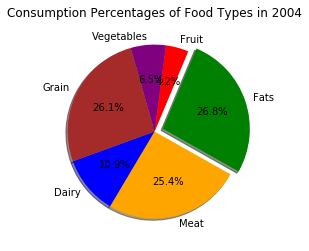

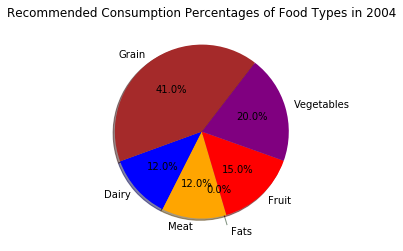

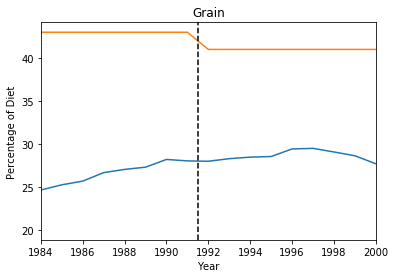

In [7]:
# Guy's Block --------------------------------------
#2004, index(34)
data_2004 = total.loc[34,:]
#print(data_2004)
data=data_2004[[1,2,3,4,5,6]]
#print(data)
#Labels
legend = ['Dairy', 'Meat', 'Fats', 'Fruit', 'Vegetables', 'Grain']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
#print(legend)
explode = (0, 0, 0.1, 0, 0, 0)
#actual pie
plt.figure(0)
plt.pie(data, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Percentages of Food Types in 2004")
plt.savefig("Images/Consumption_percentages_2004.png", transparent=True)
#recommended pie
plt.figure(1)
rec_2004 = recommended.loc[34,:]
data2=rec_2004[[3, 4, 6, 1, 5, 2]]
plt.pie(data2, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Recommended Consumption Percentages of Food Types in 2004")
plt.savefig("Images/Recommended_percentages_2004.png", transparent=True)

# Line graph Grain
plt.figure(2)
plt.plot(total2.Year, (total2.Grain *100))
plt.plot(total2.Year, recommended.Grain)
plt.title("Grain")
plt.xlabel("Year")
plt.ylabel("Percentage of Diet")
plt.xlim(1984, 2000)
#plt.ylim(15, 35)
plt.axvline(x=1991.5, color='black', linestyle='--')
plt.savefig("Images/Grain_change_2004.png", transparent=True)
#------------------------------------------------------------------

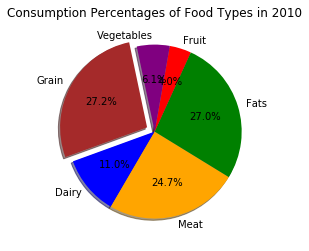

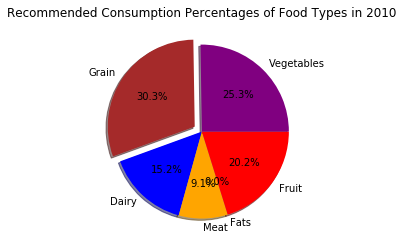

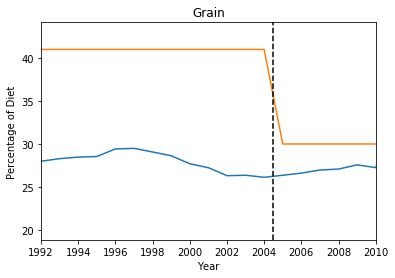

In [8]:
# Guy's Block --------------------------------------
#2010, index(40)
data_2010 = total.loc[40,:]
#print(data_2010)
data=data_2010[[1,2,3,4,5,6]]
#print(data)
#Labels
legend = ['Dairy', 'Meat', 'Fats', 'Fruit', 'Vegetables', 'Grain']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
#print(legend)
explode = (0, 0, 0, 0, 0, 0.1)
#actual pie
plt.figure(0)
plt.pie(data, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Percentages of Food Types in 2010")
plt.savefig("Images/Consumption_percentages_2010.png", transparent=True)
#recommended pie
plt.figure(1)
rec_2010 = recommended.loc[40,:]
data2=rec_2010[[3, 4, 6, 1, 5, 2]]
plt.pie(data2, explode=explode, labels=legend, shadow=True, colors=colors, autopct="%1.1f%%", startangle=200)
plt.title("Recommended Consumption Percentages of Food Types in 2010")

# Save the figure
plt.savefig("Images/Recommended_percentages_2010.png", transparent=True)

# Line graph Grain
plt.figure(2)
plt.plot(total2.Year, (total2.Grain *100))
plt.plot(total2.Year, recommended.Grain)
plt.title("Grain")
plt.xlabel("Year")
plt.ylabel("Percentage of Diet")
plt.xlim(1992, 2010)
#plt.ylim(15, 35)
plt.axvline(x=2004.5, color='black', linestyle='--')
plt.savefig("Images/Grain_change_2010.png", transparent=True)
#------------------------------------------------------------------

In [9]:
dair = stats.ttest_ind(total2.Dairy, recommended.Dairy, equal_var=False)
grai =stats.ttest_ind(total2.Grain, recommended.Grain, equal_var=False)
mea = stats.ttest_ind(total2.Meat, recommended.Protein, equal_var=False)
frui =stats.ttest_ind(total2.Fruit, recommended.Fruit, equal_var=False)
veg =stats.ttest_ind(total2.Vegetable, recommended.Vegetables, equal_var=False)
fa =stats.ttest_ind(total2.Fats, recommended.Fat, equal_var=False)

print(f"The p value for Dairy is {dair.pvalue}")
print(f"The p value for Grians is {grai.pvalue}")
print(f"The p value for Meat is {mea.pvalue}")
print(f"The p value for Fruit is {frui.pvalue}")
print(f"The p value for Vegetables is {veg.pvalue}")
print(f"The p value for Fats is {fa.pvalue}")

The p value for Dairy is 9.323762910834049e-28
The p value for Grians is 3.3653982729301794e-29
The p value for Meat is 1.3217503379466656e-36
The p value for Fruit is 4.528523079787227e-40
The p value for Vegetables is 1.7867296654548037e-42
The p value for Fats is 0.002563159131452036
